In [3]:
import numpy as np
import pandas as pd
from sklearn.tree import export_graphviz
import IPython, graphviz, re
RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

We’re going to use the same iris dataset.The task for us is now to find the best "way" to split the dataset such that best nodes can be achieved.

In [4]:
df = pd.read_csv("iris.csv")

In [6]:
df['species_label'],_ = pd.factorize(df['species'])
y = df['species_label']
X = df[['petal_length', 'petal_width']]

Now let's define a class which draws a representation of a random forest in IPython. Source: https://github.com/fastai/fastai/blob/e6b56de53f80d2b2d39037c82d3a23ce72507cd7/old/fastai/structured.py#L22

In [13]:
def draw_tree(t, df, size=10, ratio=0.6, precision=0):
    
    s=export_graphviz(t, out_file=None, feature_names=df.columns, filled=True,
                      special_characters=True, rotate=True, precision=precision)
    IPython.display.display(graphviz.Source(re.sub('Tree {',
       f'Tree {{ size={size}; ratio={ratio}', s)))

We are using RandomForestRegressor with 1 estimator, which basically means we’re using a Decision Tree model. Here is the tree structure of our model:

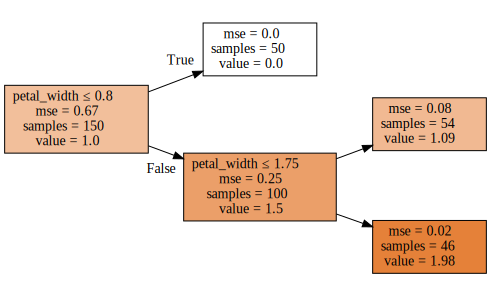

In [15]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(n_estimators=1, max_depth=2, bootstrap=False, random_state=RANDOM_SEED)
reg.fit(X, y)

draw_tree(reg.estimators_[0], X, precision=2)

Decision tree models can be used for both classification and regression. The algorithms for building trees breaks down a data set into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes. A decision node has two or more branches. Leaf node represents a classification or decision (used for regression). The topmost decision node in a tree which corresponds to the best predictor (most important feature) is called a root node. Decision trees can handle both categorical and numerical data.

In [17]:
X_train,X_test,y_train,y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=1)

dtree = tree.DecisionTreeClassifier(criterion='entropy' , max_depth=3, random_state = 0)

dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
Finally, let’s look at how we use all this to make predictions. 

In [19]:
y_pred = dtree.predict(X_test)

count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))

accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 2
Accuracy: 0.96
